In [15]:
import os

# Set environment variable to avoid memory leak warning on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "2"

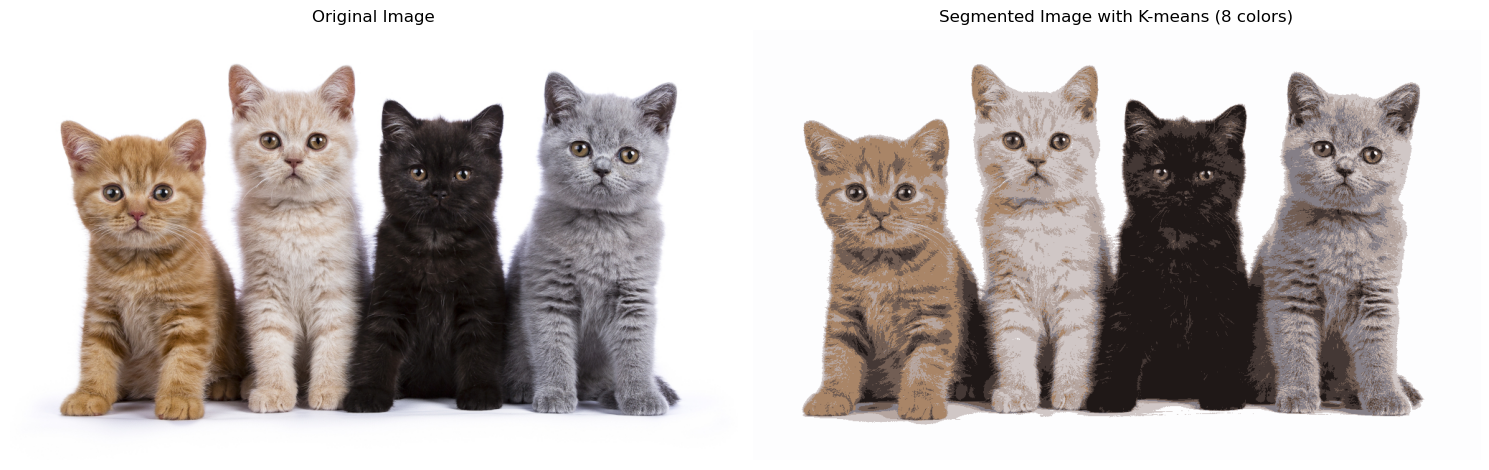

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Update the image path to the location of your downloaded image
image_path = "cat_image.jpg"  # Adjust the path as needed

# Load the image
image = Image.open(image_path)
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Apply K-means clustering with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X)

# Replace each pixel value with its corresponding cluster center
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape).astype(np.uint8)

# Plot the original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title('Segmented Image with K-means (8 colors)')
axes[1].axis('off')

plt.tight_layout()
plt.show()


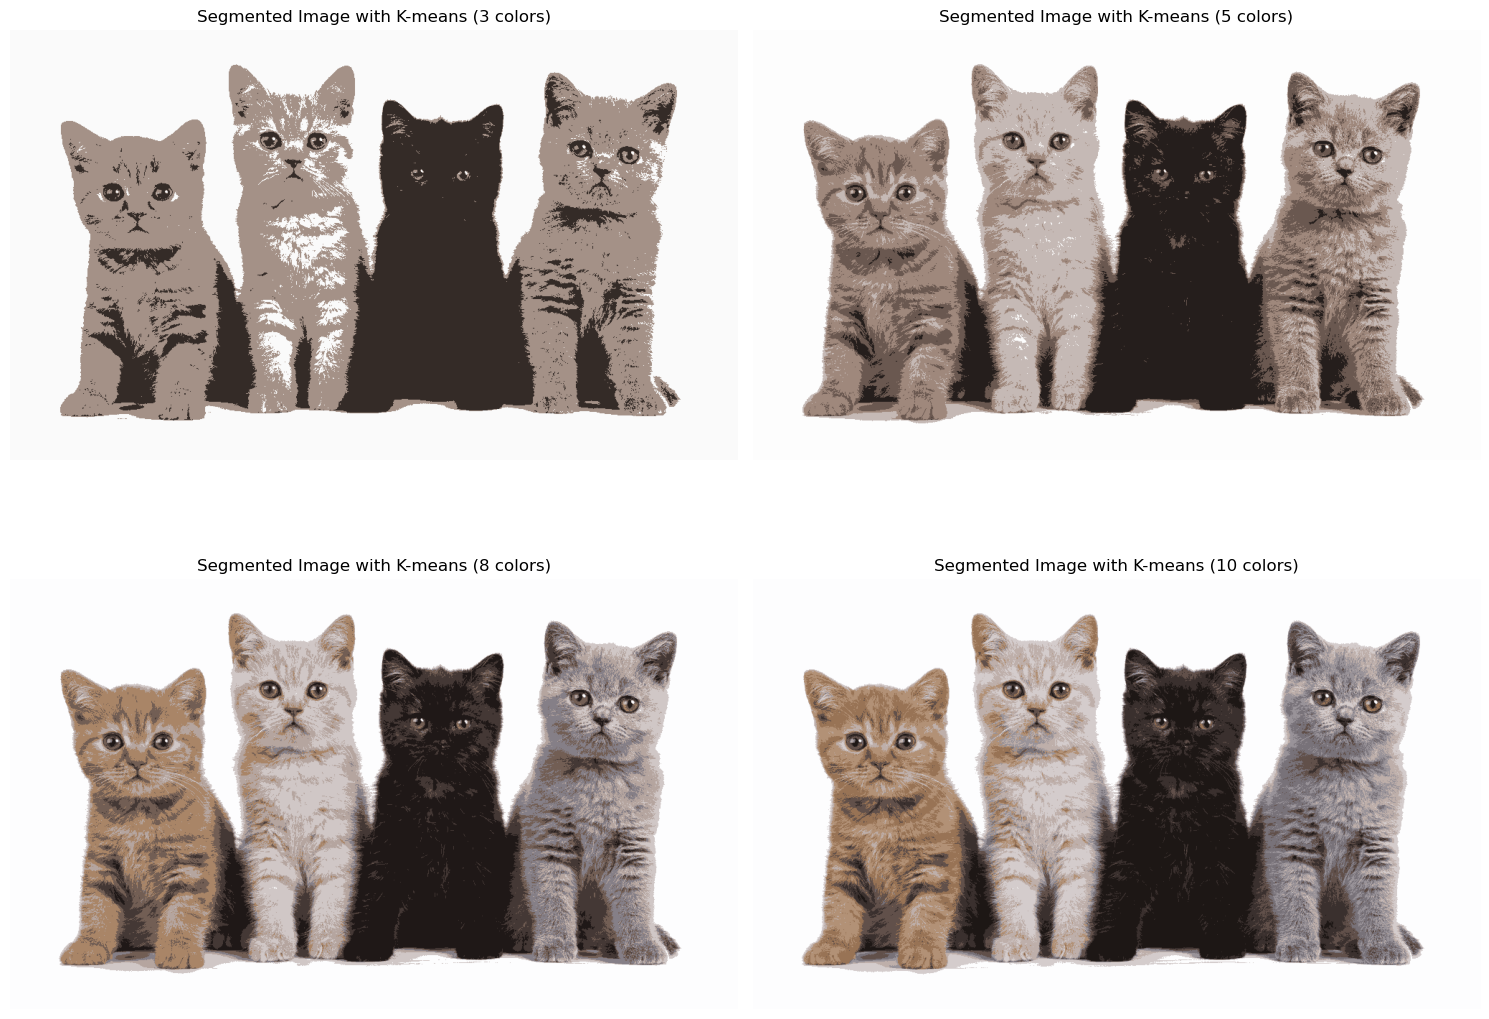

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Apply K-means clustering with different numbers of clusters
for ax, n_clusters in zip(axes.flatten(), [3, 5, 8, 10]):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape).astype(np.uint8)
    
    ax.imshow(segmented_img)
    ax.set_title(f'Segmented Image with K-means ({n_clusters} colors)')
    ax.axis('off')

plt.tight_layout()
plt.show()


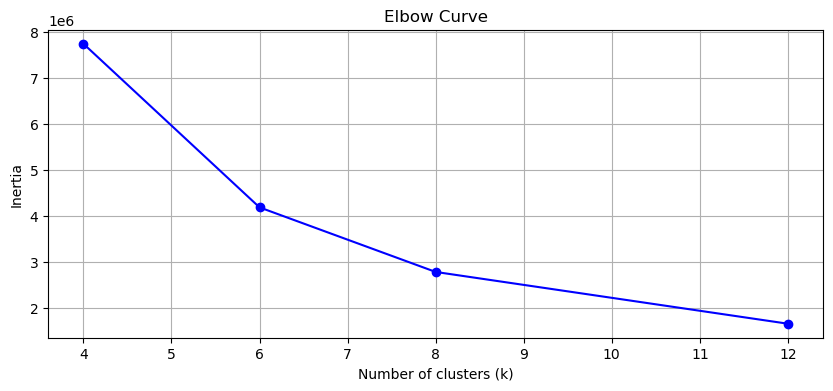

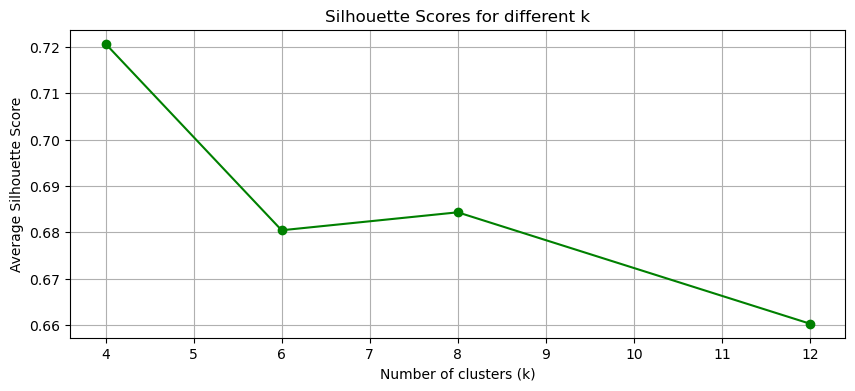

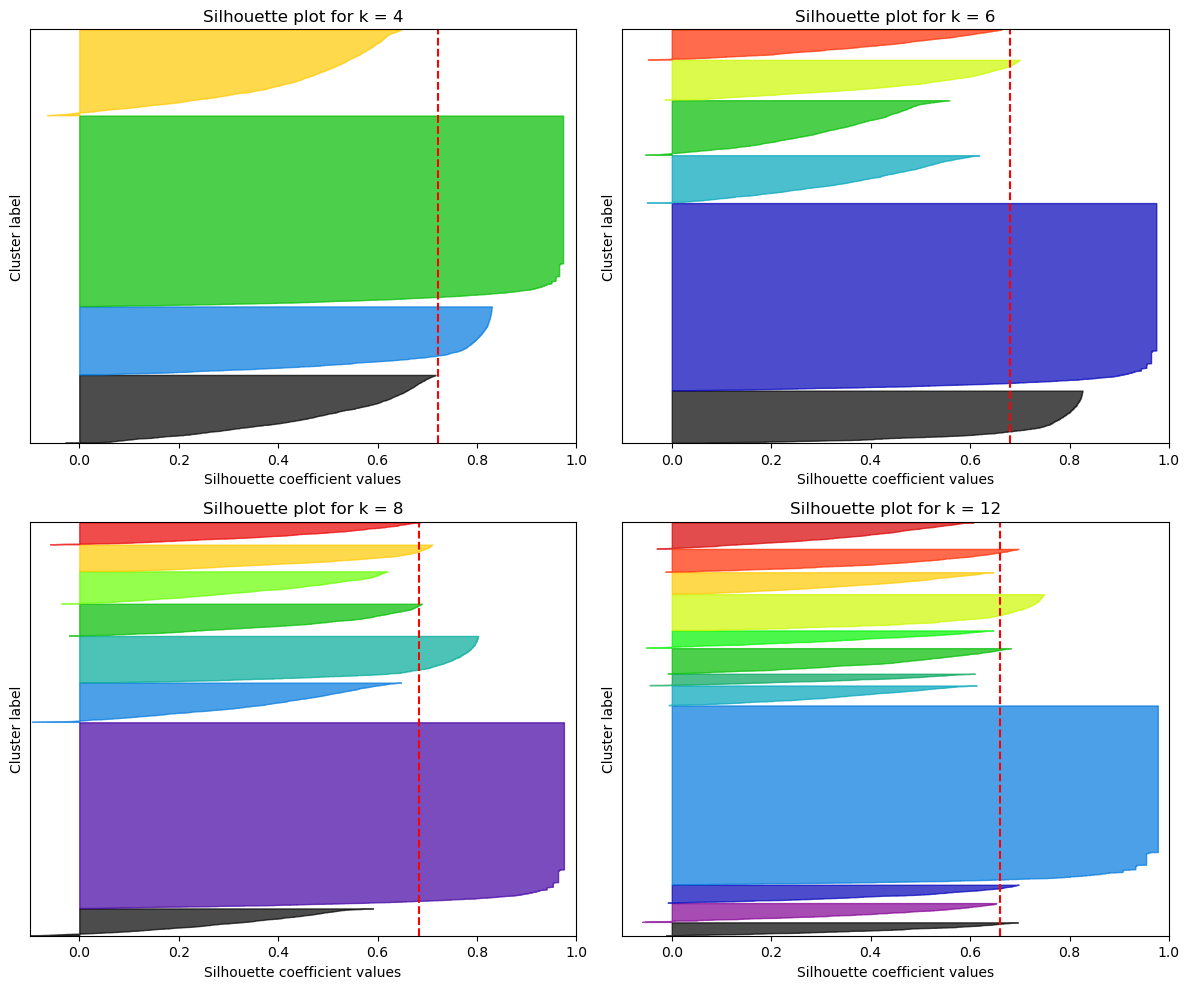

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load and resize the image to reduce computation time
image_path = "cat_image.jpg"  # Adjust the path as needed
image = Image.open(image_path)
image = image.resize((100, 100))  # Resize to 100x100 pixels
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Define the range of clusters to evaluate
k_values = [4, 6, 8, 12]

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_avg_scores = []

# Evaluate K-means for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(k_values, silhouette_avg_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.grid(True)
plt.show()

# Plot the Silhouette Diagrams
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    silhouette_vals = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    
    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = len(ith_cluster_silhouette_vals)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    
    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'Silhouette plot for k = {k}')
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


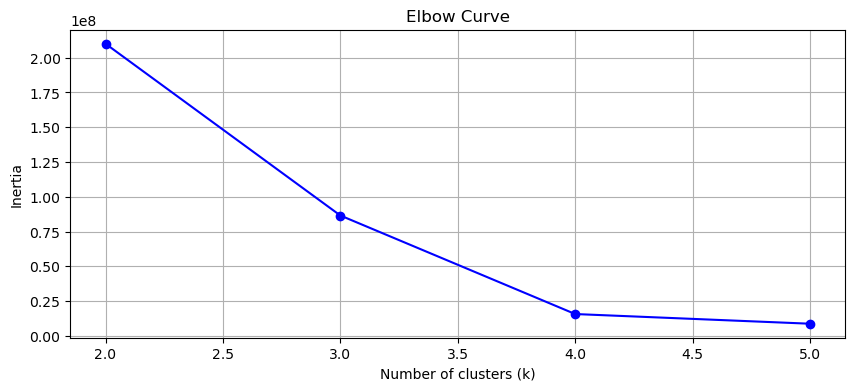

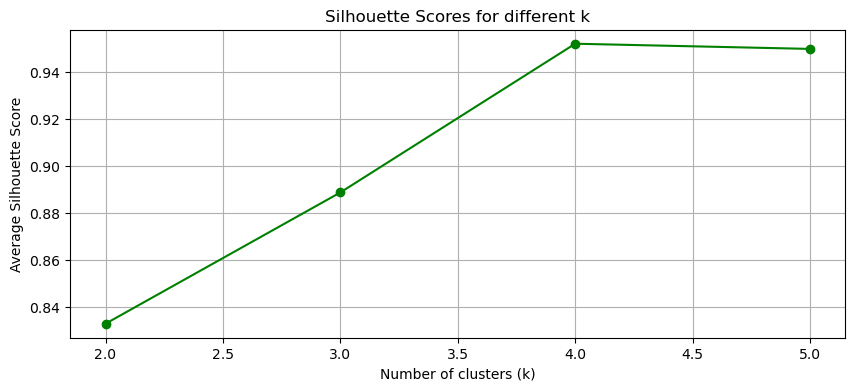

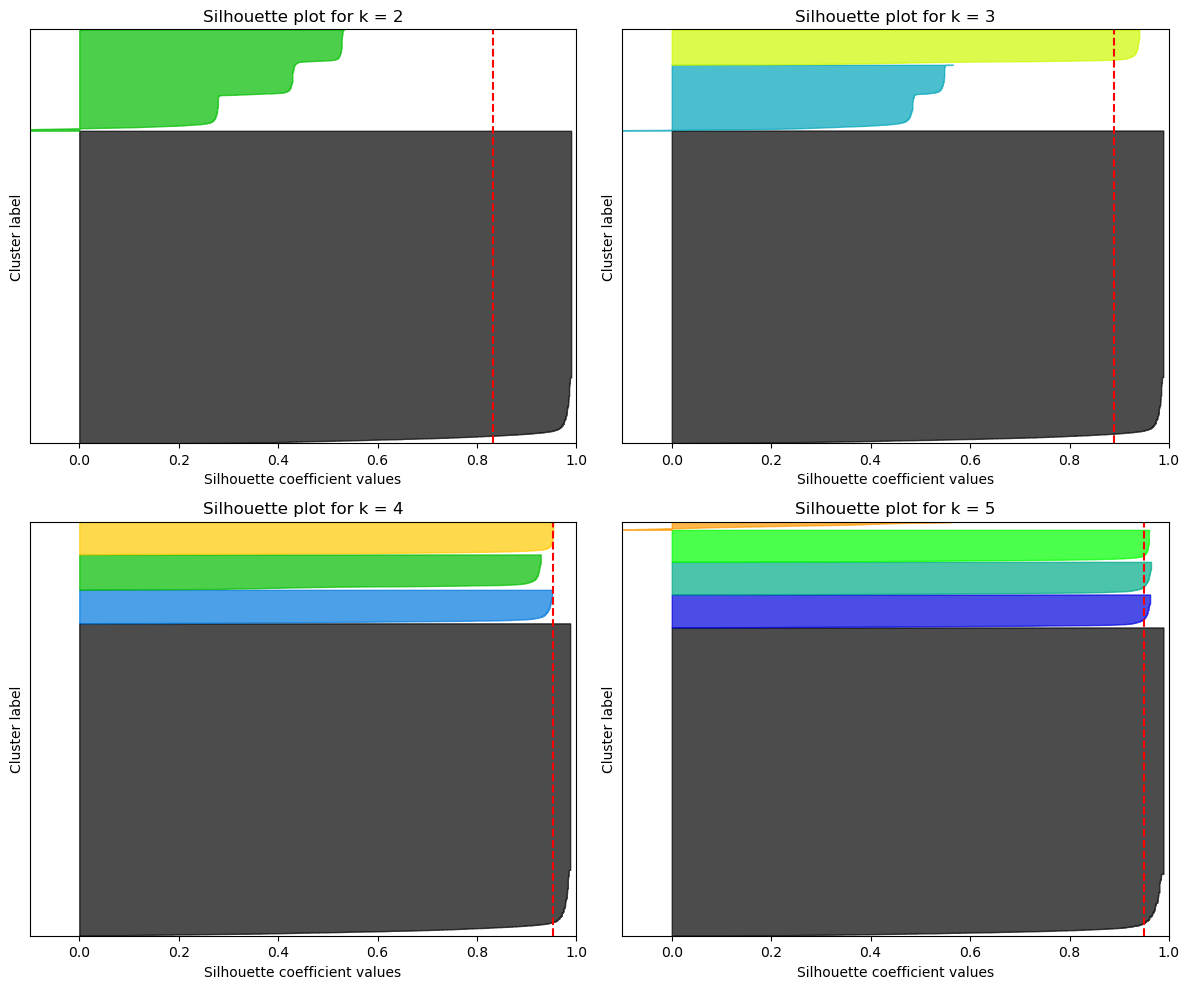

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load and resize the image to reduce computation time
image_path = "3_colors.jpg"  # Adjust the path as needed
image = Image.open(image_path)
image = image.resize((200, 200))  # Resize to 100x100 pixels
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Define the range of clusters to evaluate
k_values = [2, 3, 4, 5]

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_avg_scores = []

# Evaluate K-means for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(k_values, silhouette_avg_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.grid(True)
plt.show()

# Plot the Silhouette Diagrams
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, k in zip(axes, k_values):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    silhouette_vals = silhouette_samples(X, kmeans.labels_)
    y_lower = 10
    
    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = len(ith_cluster_silhouette_vals)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    
    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'Silhouette plot for k = {k}')
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [28]:
image_path = "3_colors.jpg"  # Adjust the path as needed
image = Image.open(image_path)

In [29]:
image.size

(424, 355)

D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >=

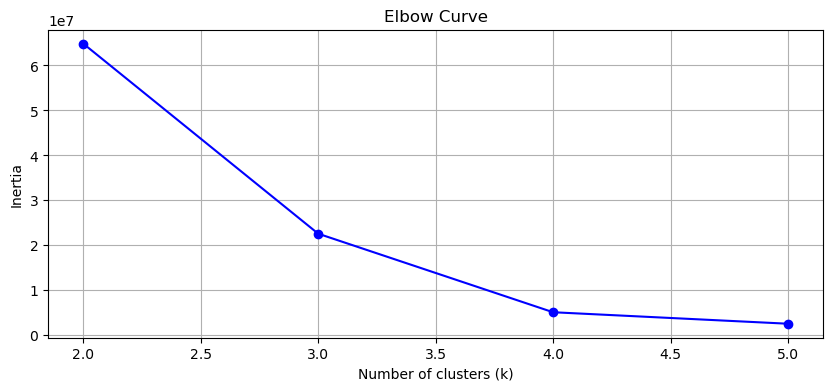

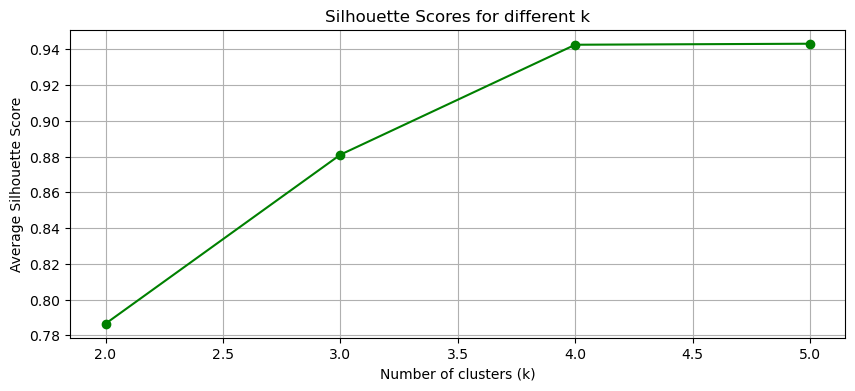

D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >=

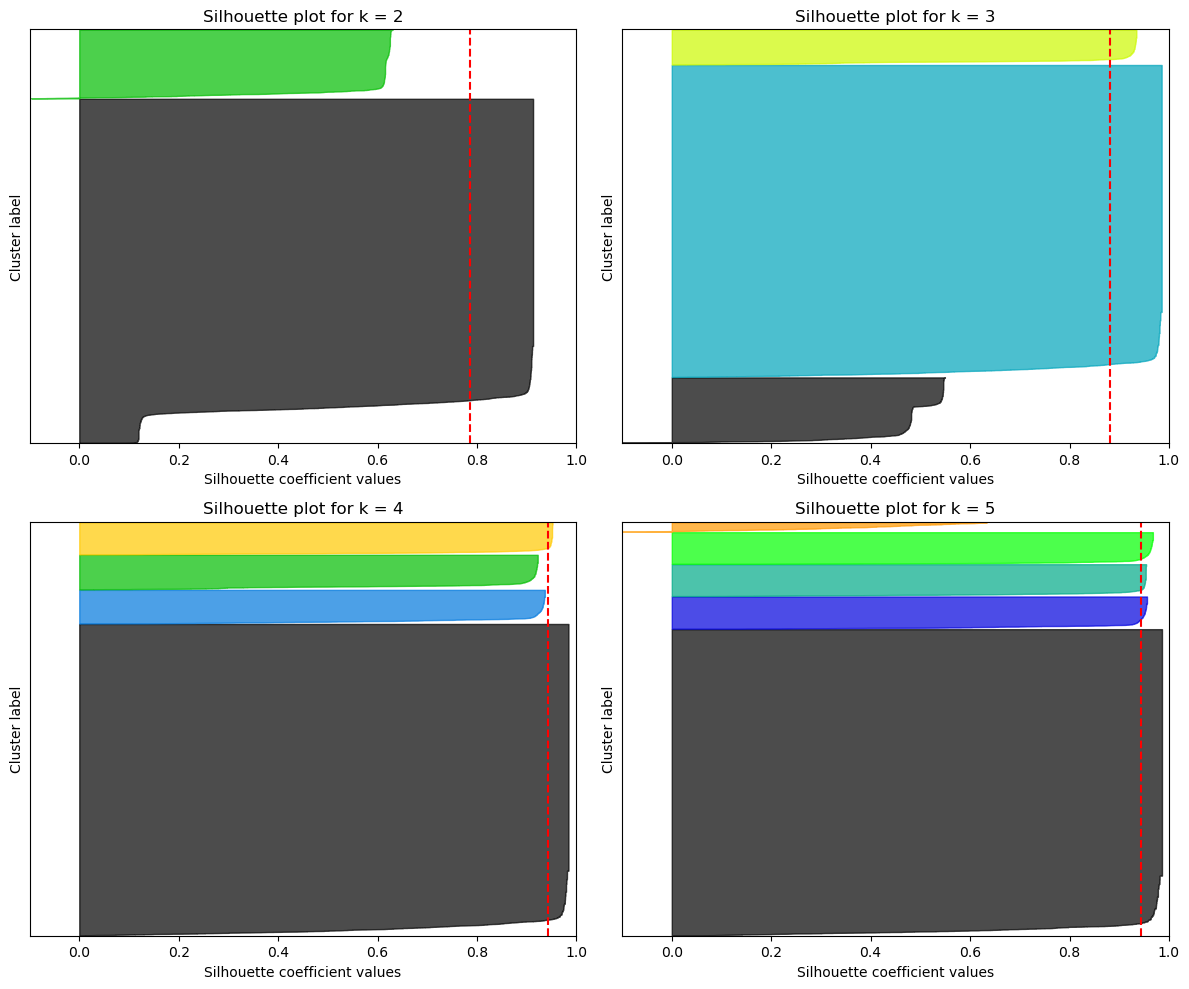

In [32]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the image
image_path = "3_colors.jpg"  # Adjust the path as needed
image = Image.open(image_path)
image = image.resize((100, 100))
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Define the range of clusters to evaluate
k_values = [2, 3, 4, 5]

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_avg_scores = []

# Evaluate MiniBatchKMeans for different values of k
for k in k_values:
    mb_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000).fit(X)
    inertia_values.append(mb_kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(X, mb_kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(k_values, silhouette_avg_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.grid(True)
plt.show()

# Plot the Silhouette Diagrams
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, k in zip(axes, k_values):
    mb_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000).fit(X)
    silhouette_vals = silhouette_samples(X, mb_kmeans.labels_)
    y_lower = 10
    
    for i in range(k):
        ith_cluster_silhouette_vals = silhouette_vals[mb_kmeans.labels_ == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = len(ith_cluster_silhouette_vals)
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        y_lower = y_upper + 10
    
    silhouette_avg = np.mean(silhouette_vals)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f'Silhouette plot for k = {k}')
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (k + 1) * 10])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [33]:
kmeans.cluster_centers_

array([[254.49388138, 254.38954638, 253.85932209],
       [ 49.56369928,  51.22428437, 144.48379994],
       [234.89022843,  30.16307107,  38.48286802],
       [252.98183587, 240.99610769,   7.06195264],
       [192.93675889, 169.57971014, 163.81027668]])

In [34]:
mb_kmeans.cluster_centers_

array([[254.36657317, 254.18783248, 253.18647838],
       [234.74027149,  30.94117647,  38.90316742],
       [253.01532913, 241.45897205,   8.45536519],
       [ 48.55911111,  50.58044444, 145.76711111],
       [183.01863354, 153.28571429, 166.41925466]])

D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Cluster 1 center RGB values: [253 253 254]
Cluster 2 center RGB values: [77 63 58]
Cluster 3 center RGB values: [184 167 160]
Cluster 4 center RGB values: [32 26 24]
Cluster 5 center RGB values: [159 121  89]
Cluster 6 center RGB values: [209 199 199]
Cluster 7 center RGB values: [155 139 135]
Cluster 8 center RGB values: [112 102 103]


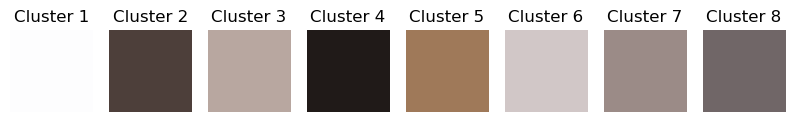

In [35]:
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "cat_image.jpg"  # Adjust the path as needed
image = Image.open(image_path)
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Apply K-means clustering
n_clusters = 8
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000).fit(X)

# Retrieve the RGB values of the cluster centers
cluster_centers = kmeans.cluster_centers_.astype(int)

# Print the RGB values
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} center RGB values: {center}")

# Optionally, visualize the cluster centers as colors
plt.figure(figsize=(10, 2))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, n_clusters, i + 1)
    plt.imshow([[center / 255]])  # Normalize RGB values to [0, 1] for display
    plt.axis('off')
    plt.title(f"Cluster {i + 1}")

plt.show()


D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Cluster 1 center RGB values: [254 253 253]
Cluster 2 center RGB values: [234  32  40]
Cluster 3 center RGB values: [ 54  56 144]
Cluster 4 center RGB values: [252 240   9]


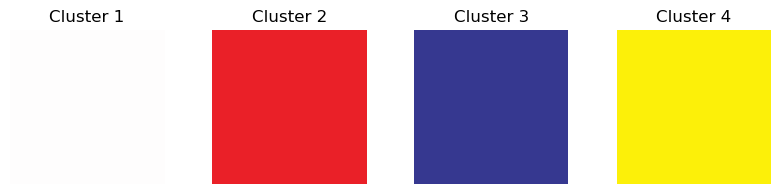

In [37]:
from sklearn.cluster import MiniBatchKMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "3_colors.jpg"  # Adjust the path as needed
image = Image.open(image_path)
image = np.array(image)

# Reshape the image to a 2D array of pixels
X = image.reshape(-1, 3)

# Apply K-means clustering
n_clusters = 4
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000).fit(X)

# Retrieve the RGB values of the cluster centers
cluster_centers = kmeans.cluster_centers_.astype(int)

# Print the RGB values
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i + 1} center RGB values: {center}")

# Optionally, visualize the cluster centers as colors
plt.figure(figsize=(10, 2))
for i, center in enumerate(cluster_centers):
    plt.subplot(1, n_clusters, i + 1)
    plt.imshow([[center / 255]])  # Normalize RGB values to [0, 1] for display
    plt.axis('off')
    plt.title(f"Cluster {i + 1}")

plt.show()